# IMPORTING PYTHON PACKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# IMPORTING DATASET

In [2]:
df_autompg=pd.read_csv('auto-mpg.csv')
df_autompg

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg
0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449,10.5,70,1,ford torino,17.0
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,27.0
394,4,97.0,52.0,2130,24.6,82,2,vw pickup,44.0
395,4,135.0,84.0,2295,11.6,82,1,dodge rampage,32.0
396,4,120.0,79.0,2625,18.6,82,1,ford ranger,28.0


LABEL ENCODING

In [3]:
le=LabelEncoder()
list=['car name']
for val in list:
    df_autompg[val]=le.fit_transform(df_autompg[val].astype(str))
df_autompg

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg
0,8,307.0,130.0,3504,12.0,70,1,49,18.0
1,8,350.0,165.0,3693,11.5,70,1,36,15.0
2,8,318.0,150.0,3436,11.0,70,1,231,18.0
3,8,304.0,150.0,3433,12.0,70,1,14,16.0
4,8,302.0,140.0,3449,10.5,70,1,161,17.0
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1,153,27.0
394,4,97.0,52.0,2130,24.6,82,2,301,44.0
395,4,135.0,84.0,2295,11.6,82,1,119,32.0
396,4,120.0,79.0,2625,18.6,82,1,159,28.0


# EXPLORATORY DATA ANALYSIS

In [4]:
df_autompg.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg
0,8,307.0,130.0,3504,12.0,70,1,49,18.0
1,8,350.0,165.0,3693,11.5,70,1,36,15.0
2,8,318.0,150.0,3436,11.0,70,1,231,18.0
3,8,304.0,150.0,3433,12.0,70,1,14,16.0
4,8,302.0,140.0,3449,10.5,70,1,161,17.0


In [5]:
df_autompg.tail()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg
393,4,140.0,86.0,2790,15.6,82,1,153,27.0
394,4,97.0,52.0,2130,24.6,82,2,301,44.0
395,4,135.0,84.0,2295,11.6,82,1,119,32.0
396,4,120.0,79.0,2625,18.6,82,1,159,28.0
397,4,119.0,82.0,2720,19.4,82,1,69,31.0


In [6]:
df_autompg.shape

(398, 9)

In [7]:
df_autompg.dtypes

cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name          int32
mpg             float64
dtype: object

In [8]:
df_autompg.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin', 'car name', 'mpg'],
      dtype='object')

In [9]:
df_autompg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null int32
mpg             398 non-null float64
dtypes: float64(4), int32(1), int64(4)
memory usage: 26.6 KB


In [10]:
df_autompg.describe()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864,148.550251,23.514573
std,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055,89.495880,7.815984
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.000000,9.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,65.250000,17.500000
50%,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,150.000000,23.000000
75%,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000,225.750000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,304.000000,46.600000


Data in all the columns appear to have normal distribution (mean very close to 50th percentile).

In [11]:
#sns.heatmap(df_autompg.isnull(),annot=True)

In [12]:
df_autompg.isnull().sum()

cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
mpg             0
dtype: int64

IMPUTER

In [13]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp = imp.fit(df_autompg.values)
df=imp.transform(df_autompg)
df_autompg=pd.DataFrame(df)
df_autompg.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

CHECKING DATA SKEWNESS

In [14]:
df_autompg.skew()

0    0.526922
1    0.719645
2    1.033003
3    0.531063
4    0.278777
5    0.011535
6    0.923776
7    0.018665
8    0.457066
dtype: float64

REMOVING DATA SKEWNESS

In [15]:
for col in df_autompg.columns:
    if df_autompg.skew().loc[col]>0.55:
        df_autompg[col]=np.log1p(df_autompg[col])
df_autompg.skew()

0    0.526922
1    0.228886
2    0.339977
3    0.531063
4    0.278777
5    0.011535
6    0.796540
7    0.018665
8    0.457066
dtype: float64

CHECKING OUTLIERS

In [16]:
z=np.abs(zscore(df_autompg))
print(z.shape)
print(np.where(z>3))

(398, 9)
(array([299, 394], dtype=int64), array([4, 4], dtype=int64))


In [17]:
df_final=df_autompg

BOXPLOT

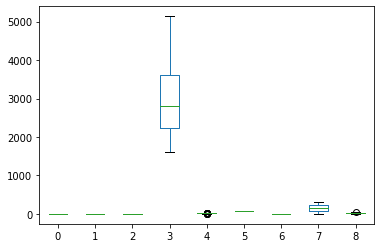

In [18]:
df_final.plot.box()

CORRELATION

In [19]:
df_final.corr()

,0,1,2,3,4,5,6,7,8
0,1.000000,0.942443,0.817791,0.896017,-0.505419,-0.348746,-0.577813,-0.275754,-0.775396
1,0.942443,1.000000,0.847517,0.936462,-0.496932,-0.330339,-0.682508,-0.319134,-0.828374
2,0.817791,0.847517,1.000000,0.852532,-0.673758,-0.378474,-0.493581,-0.261263,-0.790241
3,0.896017,0.936462,0.852532,1.000000,-0.417457,-0.306564,-0.591615,-0.255247,-0.831741
4,-0.505419,-0.496932,-0.673758,-0.417457,1.000000,0.288137,0.217409,0.128285,0.420289
5,-0.348746,-0.330339,-0.378474,-0.306564,0.288137,1.000000,0.174685,0.074761,0.579267
6,-0.577813,-0.682508,-0.493581,-0.591615,0.217409,0.174685,1.000000,0.378917,0.571291
7,-0.275754,-0.319134,-0.261263,-0.255247,0.128285,0.074761,0.378917,1.000000,0.273936
8,-0.775396,-0.828374,-0.790241,-0.831741,0.420289,0.579267,0.571291,0.273936,1.000000


PAIRPLOT

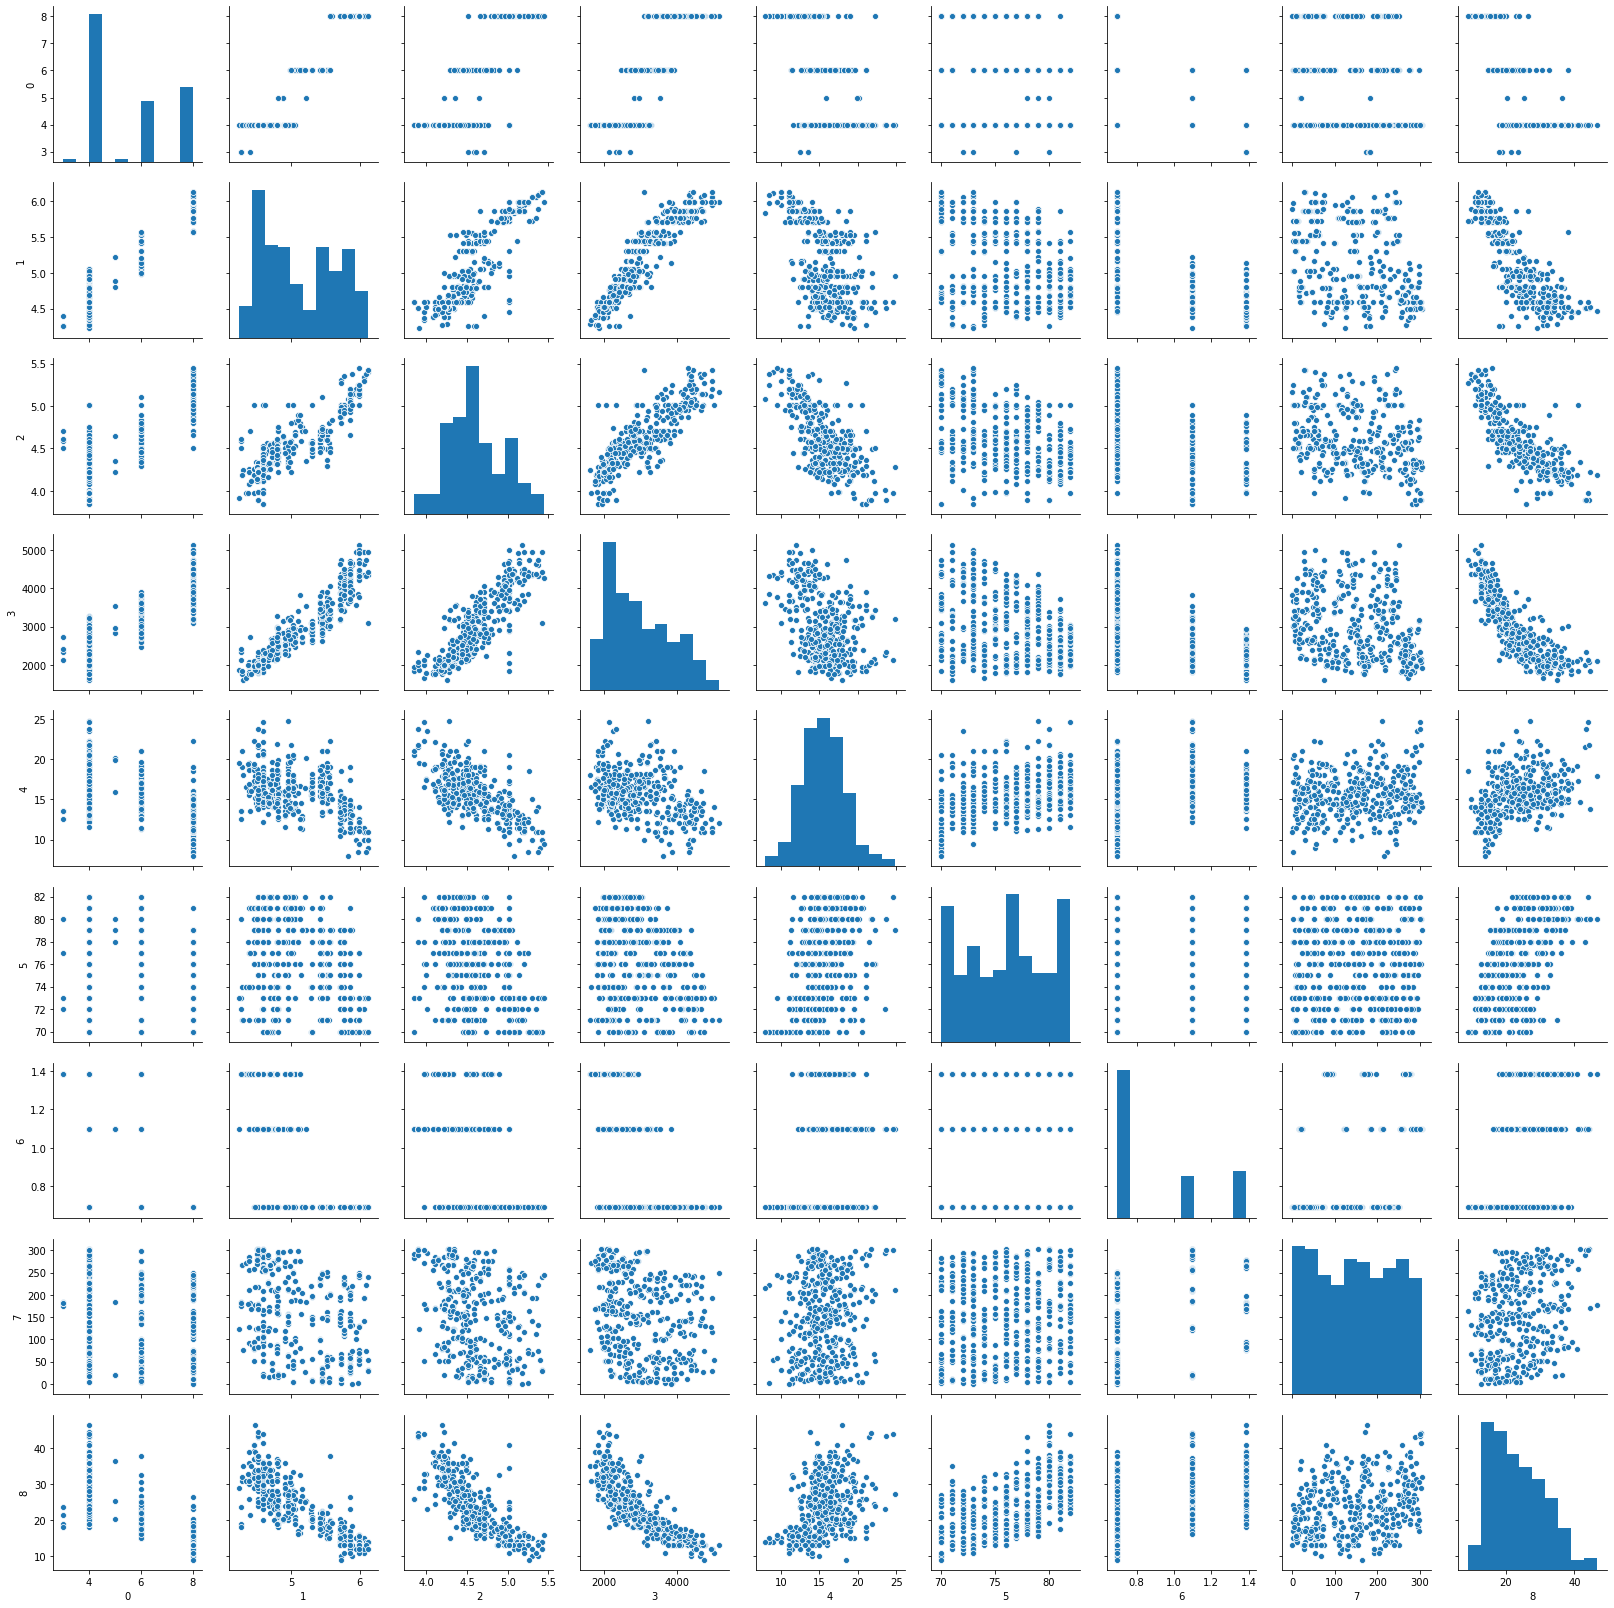

In [20]:
sns.pairplot(df_final)

# TRAIN AND TEST DATA

In [21]:
df_x=df_final.iloc[:,:-1]
print(df_x)
y=df_final.iloc[:,-1]
print(y)
print()
print(df_x.shape)
print(y.shape)

       0         1         2       3     4     5         6      7
0    8.0  5.730100  4.875197  3504.0  12.0  70.0  0.693147   49.0
1    8.0  5.860786  5.111988  3693.0  11.5  70.0  0.693147   36.0
2    8.0  5.765191  5.017280  3436.0  11.0  70.0  0.693147  231.0
3    8.0  5.720312  5.017280  3433.0  12.0  70.0  0.693147   14.0
4    8.0  5.713733  4.948760  3449.0  10.5  70.0  0.693147  161.0
..   ...       ...       ...     ...   ...   ...       ...    ...
393  4.0  4.948760  4.465908  2790.0  15.6  82.0  0.693147  153.0
394  4.0  4.584967  3.970292  2130.0  24.6  82.0  1.098612  301.0
395  4.0  4.912655  4.442651  2295.0  11.6  82.0  0.693147  119.0
396  4.0  4.795791  4.382027  2625.0  18.6  82.0  0.693147  159.0
397  4.0  4.787492  4.418841  2720.0  19.4  82.0  0.693147   69.0

[398 rows x 8 columns]
0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: 8, Length: 398, dtype: float64

(398, 8)
(398,

In [22]:
x=df_x

# TRAINING AND TESTING - VARIOUS MODELS

FUNCTION DECLARATION

In [23]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("R2 Score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("Maximum R2 Score corresponds to ",final_r_state," is ",max_r_score)
    return(final_r_state)

LINEAR REGRESSION

In [24]:
lr=LinearRegression()
r_state=maxr2_score(lr,x,y)

R2 Score corresponding to  42  is  0.8432823879347429
R2 Score corresponding to  43  is  0.839689095098713
R2 Score corresponding to  44  is  0.8544008882728844
R2 Score corresponding to  45  is  0.8140760887287077
R2 Score corresponding to  46  is  0.8567322075815108
R2 Score corresponding to  47  is  0.7913598186506312
R2 Score corresponding to  48  is  0.7951185479175613
R2 Score corresponding to  49  is  0.8594638820355599
R2 Score corresponding to  50  is  0.8319369659918598
R2 Score corresponding to  51  is  0.8215817409372447
R2 Score corresponding to  52  is  0.7952565243065791
R2 Score corresponding to  53  is  0.8145329927329883
R2 Score corresponding to  54  is  0.7529603912273044
R2 Score corresponding to  55  is  0.8617087362779959
R2 Score corresponding to  56  is  0.8486104092866094
R2 Score corresponding to  57  is  0.7963666856784766
R2 Score corresponding to  58  is  0.8551247401663137
R2 Score corresponding to  59  is  0.8107326115405458
R2 Score corresponding to  60

In [25]:
print("Mean R2 Score for Linear Regression is ",cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').mean())
print("Standard Deviation in R2 Score for Linear Regression is ",cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').std())

Mean R2 Score for Linear Regression is  0.5791635921852596
Standard Deviation in R2 Score for Linear Regression is  0.23838162231854496


KNEIGHBORS REGRESSOR

In [26]:
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=5)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 21}

In [27]:
knr=KNeighborsRegressor(n_neighbors=21)
r_state=maxr2_score(knr,x,y)

R2 Score corresponding to  42  is  0.7740453853785427
R2 Score corresponding to  43  is  0.651191335250147
R2 Score corresponding to  44  is  0.7452775030773366
R2 Score corresponding to  45  is  0.6729793579787402
R2 Score corresponding to  46  is  0.7252117194584929
R2 Score corresponding to  47  is  0.5929791432393898
R2 Score corresponding to  48  is  0.7126468874819099
R2 Score corresponding to  49  is  0.7562480297473987
R2 Score corresponding to  50  is  0.729782031218199
R2 Score corresponding to  51  is  0.7051714568376082
R2 Score corresponding to  52  is  0.6204756796476065
R2 Score corresponding to  53  is  0.6788303607569867
R2 Score corresponding to  54  is  0.5760176483155568
R2 Score corresponding to  55  is  0.8048374057851927
R2 Score corresponding to  56  is  0.7419715851532236
R2 Score corresponding to  57  is  0.6673193721227364
R2 Score corresponding to  58  is  0.7630378844022174
R2 Score corresponding to  59  is  0.7457961620721181
R2 Score corresponding to  60 

In [28]:
print("Mean R2 Score for KNN Regression is ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for KNN Regression is ",cross_val_score(knr,x,y,cv=5,scoring='r2').std())

Mean R2 Score for KNN Regression is  0.3402962270830921
Standard Deviation in R2 Score for KNN Regression is  0.572456226405353


LASSO REGRESSION

In [29]:
ls=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(ls,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [30]:
ls=Lasso(alpha=1)
r_state=maxr2_score(ls,x,y)

R2 Score corresponding to  42  is  0.8308040369636872
R2 Score corresponding to  43  is  0.826039598356406
R2 Score corresponding to  44  is  0.84209394662723
R2 Score corresponding to  45  is  0.7901787140051755
R2 Score corresponding to  46  is  0.8280328692892721
R2 Score corresponding to  47  is  0.7976832797754645
R2 Score corresponding to  48  is  0.7820127553558776
R2 Score corresponding to  49  is  0.8460286171685976
R2 Score corresponding to  50  is  0.8142286585501879
R2 Score corresponding to  51  is  0.7906783931478604
R2 Score corresponding to  52  is  0.7639574665967517
R2 Score corresponding to  53  is  0.7884526587337837
R2 Score corresponding to  54  is  0.7094219446177096
R2 Score corresponding to  55  is  0.8564358451619718
R2 Score corresponding to  56  is  0.8136102706820558
R2 Score corresponding to  57  is  0.7697604766251649
R2 Score corresponding to  58  is  0.8412266072719928
R2 Score corresponding to  59  is  0.7890741227655826
R2 Score corresponding to  60  

In [31]:
print("Mean R2 Score for Lasso Regression is ",cross_val_score(ls,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Lasso Regression is ",cross_val_score(ls,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Lasso Regression is  0.5906941259645866
Standard Deviation in R2 Score for Lasso Regression is  0.26671397842444383


RIDGE REGRESSION

In [32]:
rd=Ridge()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(rd,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [33]:
rd=Ridge(alpha=1)
r_state=maxr2_score(rd,x,y)

R2 Score corresponding to  42  is  0.8441007320896903
R2 Score corresponding to  43  is  0.8399637516596151
R2 Score corresponding to  44  is  0.8525187437943995
R2 Score corresponding to  45  is  0.8154420789427127
R2 Score corresponding to  46  is  0.8558814699796936
R2 Score corresponding to  47  is  0.8045313182912468
R2 Score corresponding to  48  is  0.7987462542804737
R2 Score corresponding to  49  is  0.8596035550119232
R2 Score corresponding to  50  is  0.8312983741481605
R2 Score corresponding to  51  is  0.819209282066023
R2 Score corresponding to  52  is  0.7947844353269933
R2 Score corresponding to  53  is  0.8141402838766147
R2 Score corresponding to  54  is  0.7495337942004675
R2 Score corresponding to  55  is  0.8624226876017808
R2 Score corresponding to  56  is  0.8470256116731626
R2 Score corresponding to  57  is  0.7942266234466977
R2 Score corresponding to  58  is  0.856456897662252
R2 Score corresponding to  59  is  0.8097610455922056
R2 Score corresponding to  60 

In [34]:
print("Mean R2 Score for Ridge Regression is ",cross_val_score(rd,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Ridge Regression is ",cross_val_score(rd,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Ridge Regression is  0.5859782896727388
Standard Deviation in R2 Score for Ridge Regression is  0.23077373421307143


ELASTIC NET REGRESSION

In [35]:
enr=ElasticNet()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(enr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [36]:
enr=ElasticNet(alpha=1)
r_state=maxr2_score(enr,x,y)

R2 Score corresponding to  42  is  0.8302152508026508
R2 Score corresponding to  43  is  0.8271683294279221
R2 Score corresponding to  44  is  0.837541493221541
R2 Score corresponding to  45  is  0.7899726706929746
R2 Score corresponding to  46  is  0.8288857803722954
R2 Score corresponding to  47  is  0.7992954656437898
R2 Score corresponding to  48  is  0.7823585478996794
R2 Score corresponding to  49  is  0.8436644534032298
R2 Score corresponding to  50  is  0.8145678847468052
R2 Score corresponding to  51  is  0.7909764619433004
R2 Score corresponding to  52  is  0.7651908978399555
R2 Score corresponding to  53  is  0.790201363162183
R2 Score corresponding to  54  is  0.7098354023482915
R2 Score corresponding to  55  is  0.8559303874758317
R2 Score corresponding to  56  is  0.8147659163702895
R2 Score corresponding to  57  is  0.7708241259633497
R2 Score corresponding to  58  is  0.8415537151685614
R2 Score corresponding to  59  is  0.7890200452969347
R2 Score corresponding to  60 

In [37]:
print("Mean R2 Score for Elastic Net Regression is ",cross_val_score(enr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Elastic Net Regression is ",cross_val_score(enr,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Elastic Net Regression is  0.5926504895627525
Standard Deviation in R2 Score for Elastic Net Regression is  0.25184860191152597


GRADIENT BOOSTING REGRESSOR

In [38]:
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [39]:
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=1000)
r_state=maxr2_score(gbr,x,y)

R2 Score corresponding to  42  is  0.9002933672661461
R2 Score corresponding to  43  is  0.9126382215767839
R2 Score corresponding to  44  is  0.8473779154408333
R2 Score corresponding to  45  is  0.8557743135534126
R2 Score corresponding to  46  is  0.8847137284481769
R2 Score corresponding to  47  is  0.8303045684226897
R2 Score corresponding to  48  is  0.83309491664191
R2 Score corresponding to  49  is  0.8839296534448622
R2 Score corresponding to  50  is  0.8404311353155535
R2 Score corresponding to  51  is  0.8824572133332003
R2 Score corresponding to  52  is  0.8004341511630362
R2 Score corresponding to  53  is  0.8736529933500097
R2 Score corresponding to  54  is  0.8027946587600836
R2 Score corresponding to  55  is  0.8649500039850353
R2 Score corresponding to  56  is  0.8991422552758057
R2 Score corresponding to  57  is  0.8710303343747882
R2 Score corresponding to  58  is  0.9006332954884336
R2 Score corresponding to  59  is  0.8679349715625735
R2 Score corresponding to  60 

In [40]:
print("Mean R2 Score for Gradient Boosting Regressor is ",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Gradient Boosting Regressor is ",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Gradient Boosting Regressor is  0.7782903851142866
Standard Deviation in R2 Score for Gradient Boosting Regressor is  0.15843600286692044


# BEST MODEL

R2 SCORE AND RMSE

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=91,test_size=0.20)
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
print("R2 Score is ",r2_score(y_test,y_pred))
print("RMSE is ",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score is  0.9354267460682656
RMSE is  1.8972302385453217


CROSS VALIDATION

In [42]:
score=cross_val_score(gbr,x,y,cv=5)
print('Score is ',score)
print('Mean Score is ', score.mean())
print('Standard Deviation is ',score.std())

Score is  [0.91863584 0.8794511  0.84636076 0.76427158 0.46636453]
Mean Score is  0.7750167633609517
Standard Deviation is  0.16248359912733615


# PICKLE

In [43]:
joblib.dump(gbr,'autompg.pkl')

['autompg.pkl']